In [1]:
# https://github.com/joelgrus/data-science-from-scratch/blob/master/code/simple_linear_regression.py

%matplotlib inline
import matplotlib.pyplot as plt
from __future__ import division
from collections import Counter, defaultdict
from linear_algebra import vector_subtract
from statistics import mean, correlation, standard_deviation, de_mean
from gradient_descent import minimize_stochastic
import math, random

num_friends_good = [49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
daily_minutes_good = [68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]


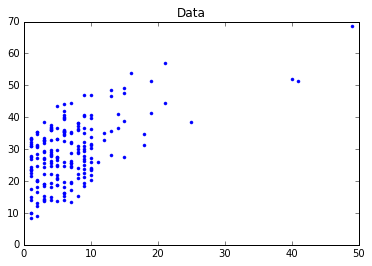

In [2]:
plt.title('Data')
plt.plot(num_friends_good, daily_minutes_good, 'b.', label='friends vs minutes on site')
plt.show()

In [3]:
# y = bx + a + e
# The right a and b are those that makes sum_of_squared_errors as small as possible

def predict(alpha, beta, x_i):
    return beta * x_i + alpha

def error(alpha, beta, x_i, y_i):
    return y_i - predict(alpha, beta, x_i)

def sum_of_squared_errors(alpha, beta, x, y):
    return sum(error(alpha, beta, x_i, y_i) ** 2
               for x_i, y_i in zip(x, y))

# a and b are given by:

def least_squares_fit(x,y):
    """given training values for x and y,
    find the least-squares values of alpha and beta"""
    beta = correlation(x, y) * standard_deviation(y) / standard_deviation(x)
    alpha = mean(y) - beta * mean(x)
    return alpha, beta

alpha 22.9475524135
beta 0.903865945606
r-squared 0.329107837784


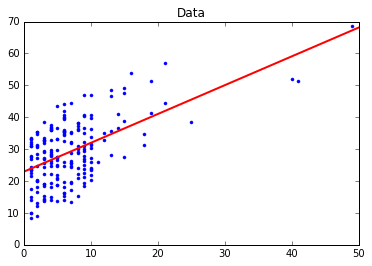

In [26]:
# We need to make sure the model fits
# R squared
# Errors are NID(0, d)

def total_sum_of_squares(y):
    """  SUM  (Y - mean(Y))^2 """
    return sum(v ** 2 for v in de_mean(y)) 

def r_squared(alpha, beta, x, y):
    """the fraction of variation in y captured by the model, which equals
    1 - the fraction of variation in y not captured by the model"""
    
    return 1.0 - (sum_of_squared_errors(alpha, beta, x, y) /
                  total_sum_of_squares(y))

alpha, beta = least_squares_fit(num_friends_good, daily_minutes_good)
print "alpha", alpha
print "beta", beta
print "r-squared", r_squared(alpha, beta, num_friends_good, daily_minutes_good)

plt.title('Data')
plt.plot(num_friends_good, daily_minutes_good, 'b.', label='friends vs minutes on site')
y= [predict(alpha, beta, x) for x in  range(0,51)]
plt.plot(range(0,51), y, 'r',lw=2)
plt.show()


In [12]:
# Same with gradient stochastic

def squared_error(x_i, y_i, theta):
    alpha, beta = theta
    return error(alpha, beta, x_i, y_i) ** 2

def squared_error_gradient(x_i, y_i, theta):
    alpha, beta = theta
    return [-2 * error(alpha, beta, x_i, y_i),       # alpha partial derivative
            -2 * error(alpha, beta, x_i, y_i) * x_i] # beta partial derivative

alpha, beta = minimize_stochastic(squared_error, 
                                      squared_error_gradient,
                                      num_friends_good,
                                      daily_minutes_good, 
                                      theta,
                                      0.0001)
print "alpha", alpha
print "beta", beta

alpha 22.9467256975
beta 0.904065171001
